<a href="https://colab.research.google.com/github/praseedm/Spaceship_titanic/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/praseedm/Spaceship_titanic.git

Cloning into 'Spaceship_titanic'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), 345.14 KiB | 4.16 MiB/s, done.


In [2]:
import pandas as pd
import os

In [3]:
DATA_DIR = os.path.join('/content/Spaceship_titanic/data')

In [7]:
train_df = pd.read_csv(os.path.join(DATA_DIR, "train.csv"))

In [8]:
train_df.shape

(8693, 14)

In [9]:
train_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


## Data cleaning and preprocessing

Identify feature types : categorical, ordinal, numberical, boolean, ...

Remove nun,blank or empty values

In [ ]:
train_df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [ ]:
train_df["CryoSleep"].unique()

array([False, True, nan], dtype=object)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
#Categorical features

for col in train_df.select_dtypes(include=['object']).columns:
  print(col)

PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [ ]:
#Numerical features

for col in train_df._get_numeric_data().columns:
  print(col)

Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Transported


In [ ]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
train_df.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


## Plots

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

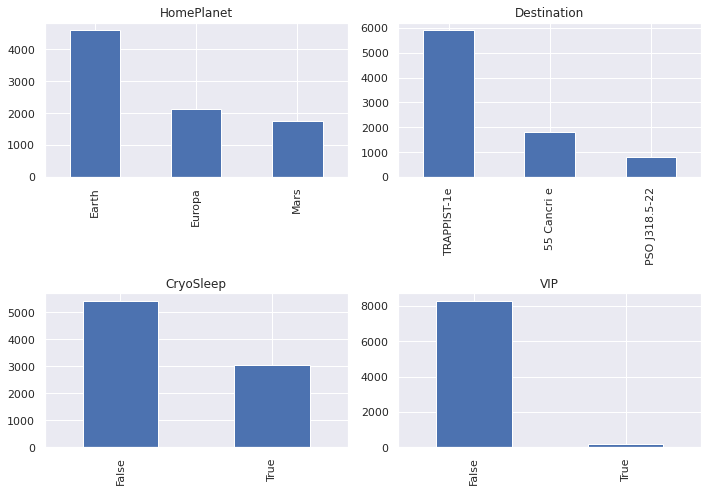

In [ ]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
train_df['HomePlanet'].value_counts().plot(kind='bar', title='HomePlanet')
plt.subplot(2,2,2)
train_df['Destination'].value_counts().plot(kind='bar', title='Destination')
plt.subplot(2,2,3)
train_df['CryoSleep'].value_counts().plot(kind='bar', title='CryoSleep')
plt.subplot(2,2,4)
train_df['VIP'].value_counts().plot(kind='bar',title='VIP')
# plt.subplot(2,2,5)
# train_df['Cabin'].value_counts().plot(kind='bar',title='Cabin')
plt.tight_layout();

In [ ]:
num_variables = list(train_df._get_numeric_data().columns)
# print(num_variables)
num_variables.remove('Transported')
print(num_variables)

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


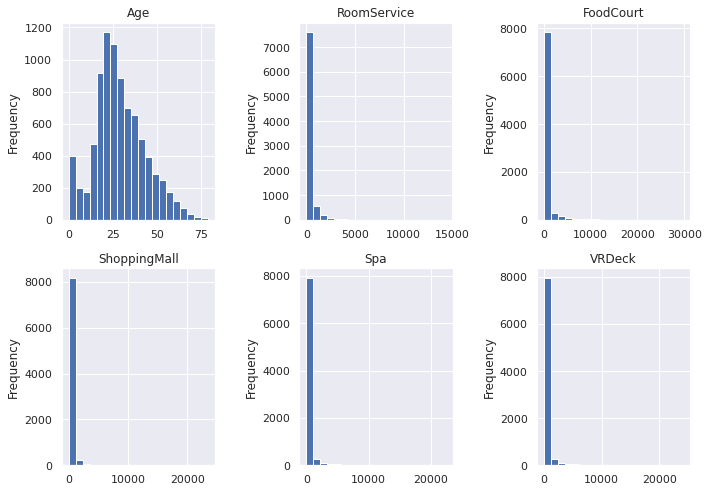

In [ ]:
plt.figure(figsize=(10,7))
for i,num_col in enumerate(num_variables):
    plt.subplot(2,3,i+1)
    train_df[num_col].plot(kind='hist', bins=20)
    plt.title(num_col)
plt.tight_layout();

## Profiling using pandas Profiling

In [4]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     \ 22.6 MB 19.3 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 77.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 7.6 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=344995 sha256=3e23d26ebc45258da785ec2b67311a8469012fb1174ac5150cbe82e0dc77a357
  Stored in directory: /tmp/pip-ephem-wheel-cache-9tx6jfes/wheels/43/c8/f4/c0ebc32d7f20fe89d0e92d90eaeef5f0c0594a89b6bc16b352
Successfully built ydata-profiling
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0
  Attempting uninsta

In [5]:
from pandas_profiling import ProfileReport

In [10]:
profile = ProfileReport(train_df, title="Spaceship Titanic")

In [11]:
profile.to_file(output_file="Profiler_output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]